# Global Power Plant Database


In [279]:
!pip install scipy
!pip install Scikit-learn

In [324]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
import sklearn as sl

In [182]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation:
    
Dataset contain 908 rows with 25 columns.
Some of feature are with object datatypes and other with float.
other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

# Statistical Analysis

In [185]:
df.isin([' ','NA','-','?']).sum().any()

False

Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [186]:
df.duplicated().sum()

0

No Duplicate Entry Present in data.

# Start with looking at missing value.

Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

In [187]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [188]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


# Proposed Strategy to Handle Missing data :

# Missing value Impuatation

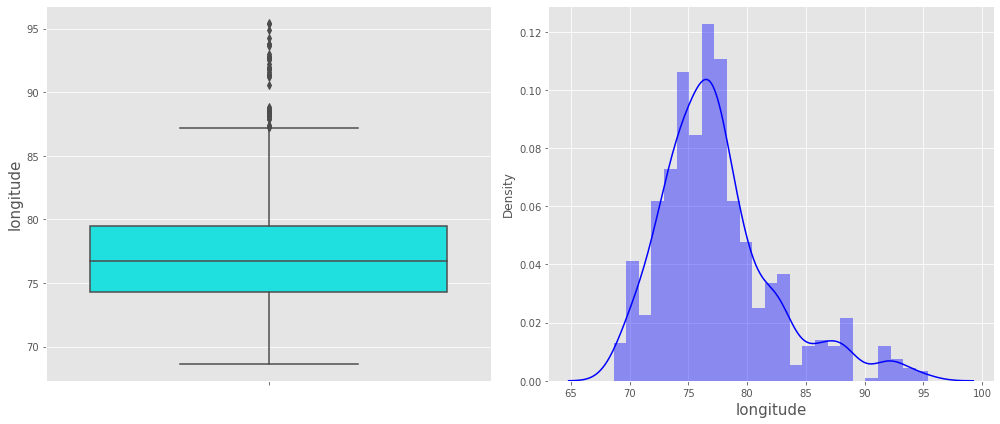

In [189]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

# Based on presense of outliers we will impute longitude we with median.

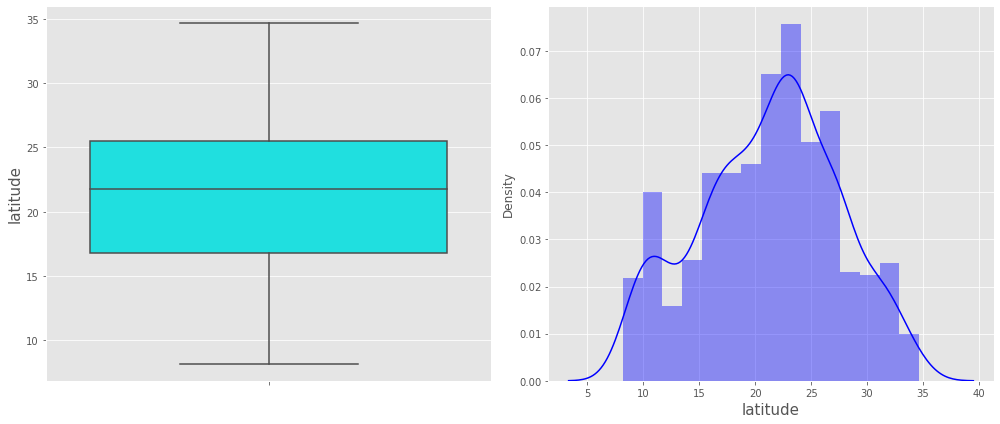

In [190]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

# Based on absense of outliers we will impute latitude we with mean.

In [191]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [192]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


# Statstical Matrix

In [193]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# Observation:

Bigest Powerplant has power generation capacity of 4760 MW.
In each Generation-GWHours columns Mean is greater than Median.
Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

# Regression Target feature - Capacity

Before visualing feature let find details about Smallest & Biggest Powerplant

In [194]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [195]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [196]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


Observations :
Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.
As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

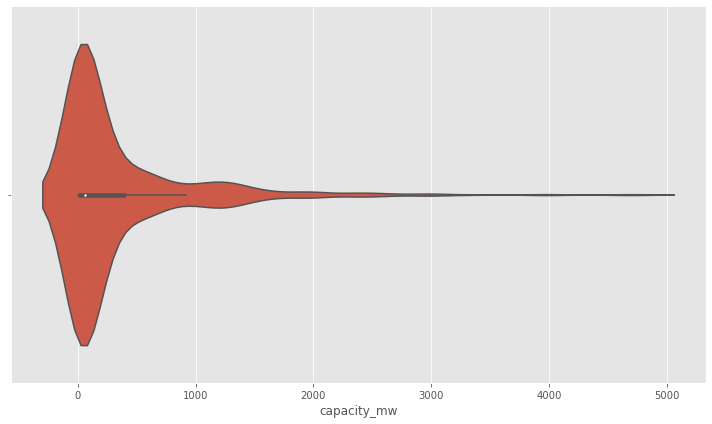

In [197]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

We can see there are very powerplant of capacity more than 1500 MW. Let check

In [198]:
df.loc[df.capacity_mw >1500].shape

(39, 15)

In [199]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

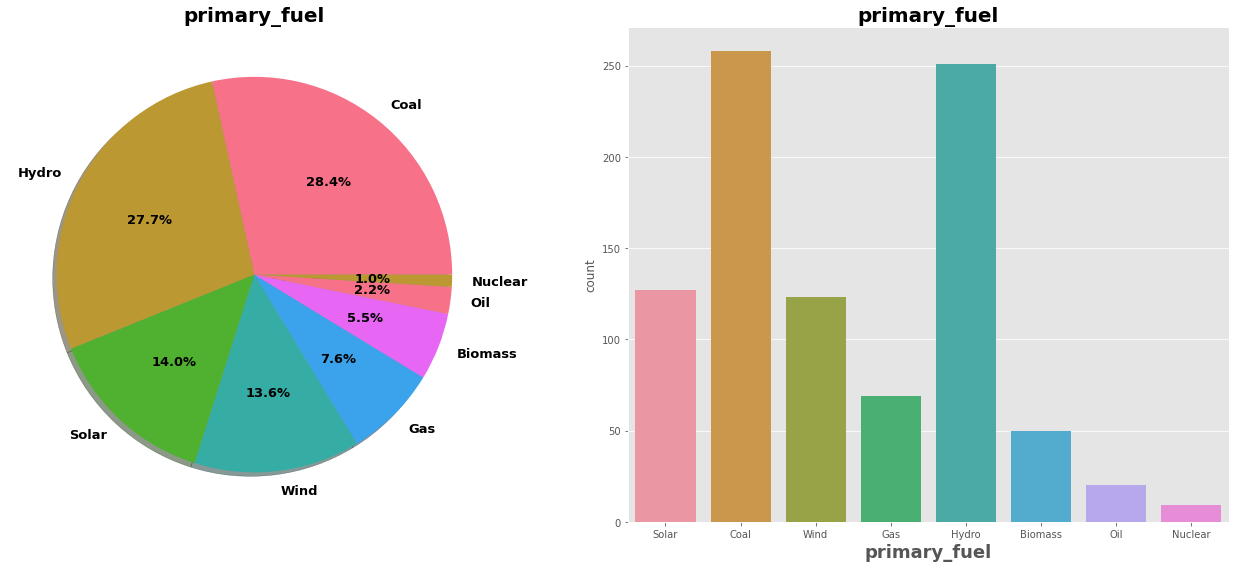

In [200]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [201]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Observations:
    
Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.

In [202]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [203]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Observations:
    
Out of Total PowerGeneration Maximum comes from Coal.

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.

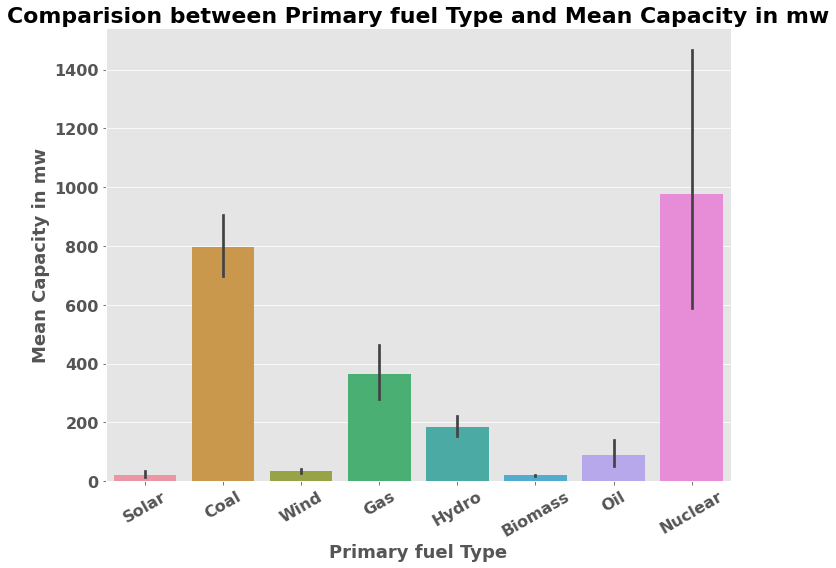

In [204]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

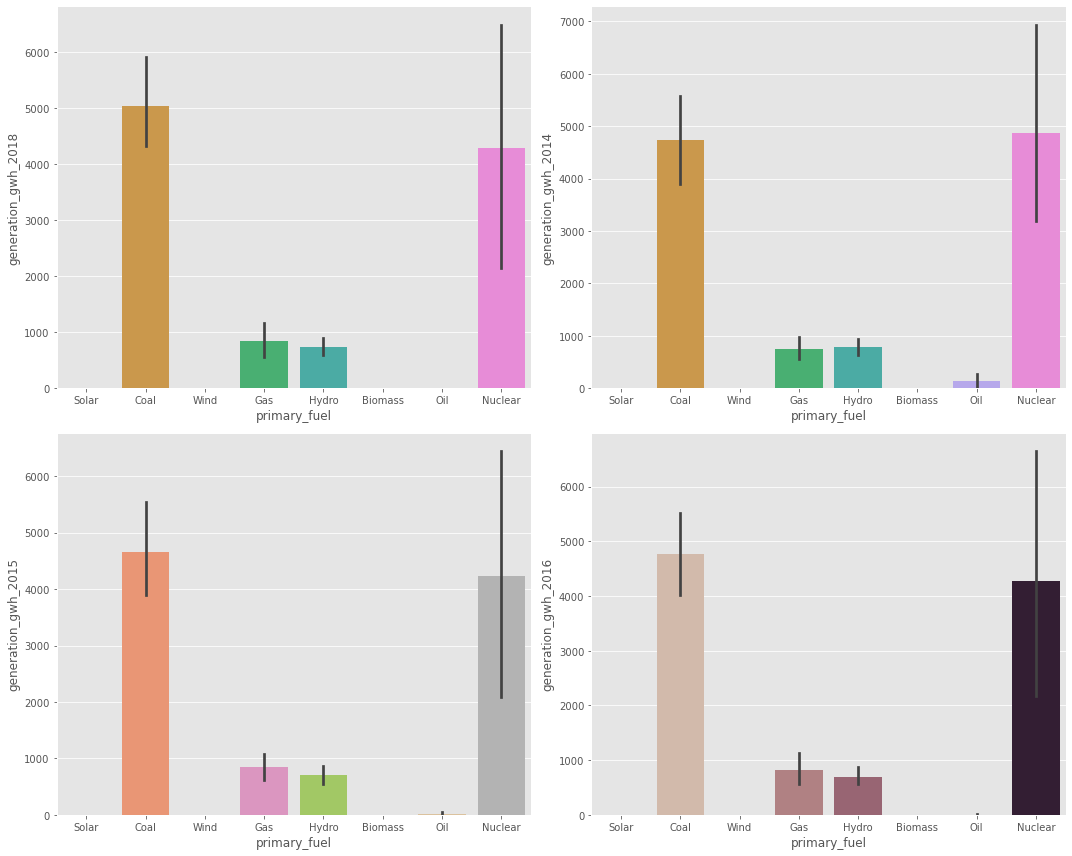

In [205]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

Observations:
    
From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. 
Reason is high efficieny of Nuclear powerplants.
Other fuel types have very less contribution to power generation.

# Location vs Primary Fuel

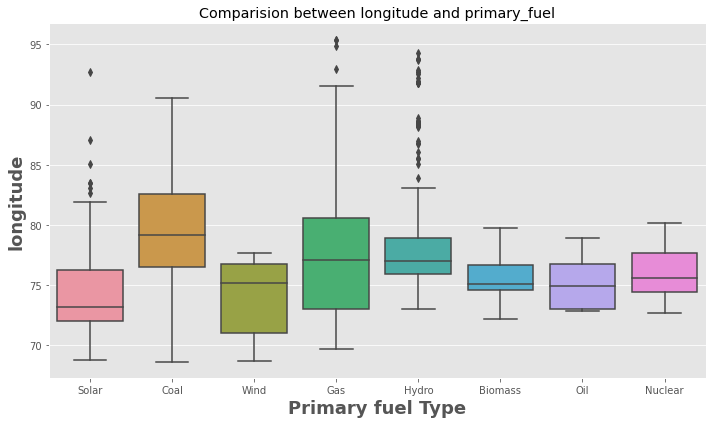

In [206]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

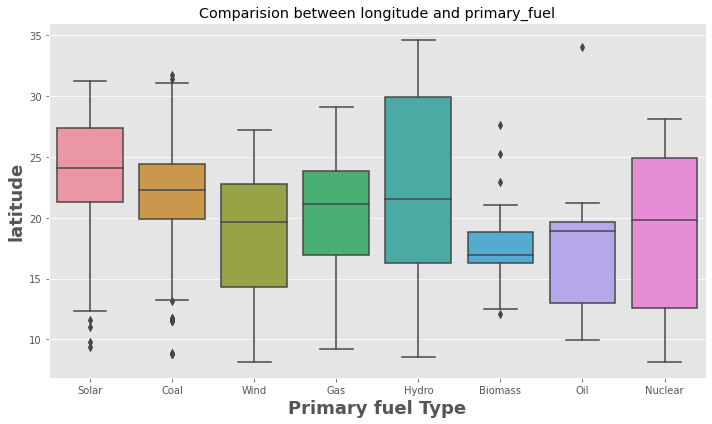

In [207]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

Observations:
    
Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.

We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

# Location vs Capacity

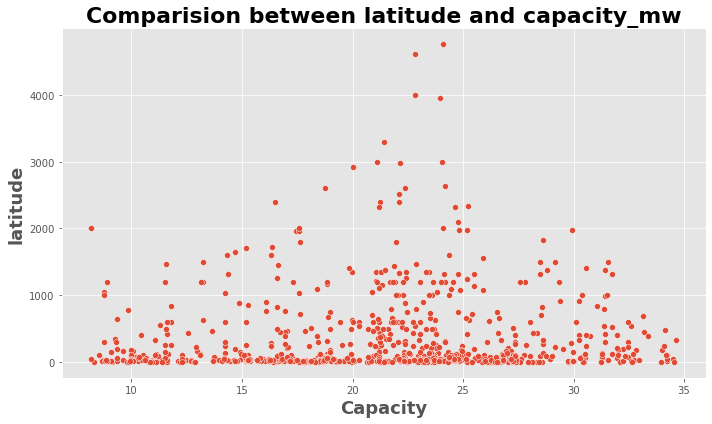

In [208]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

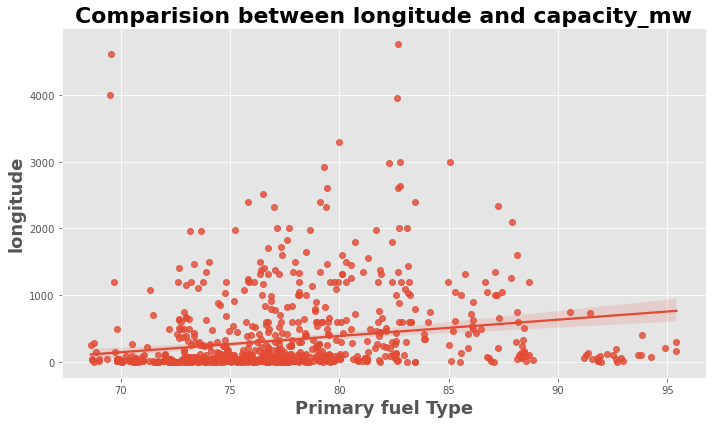

In [209]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

# Commission age vs primary fuel

In [210]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [211]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 92.0
The youngest powerplant Age : 1.0


In [212]:
df.loc[df.Power_plant_age==92]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,92.0


Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

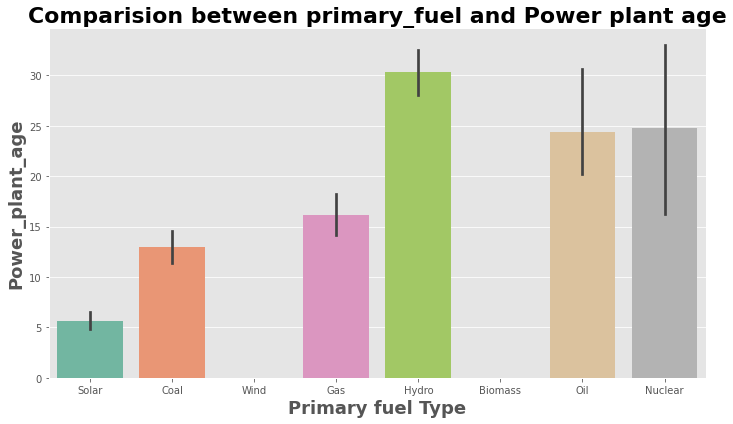

In [213]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

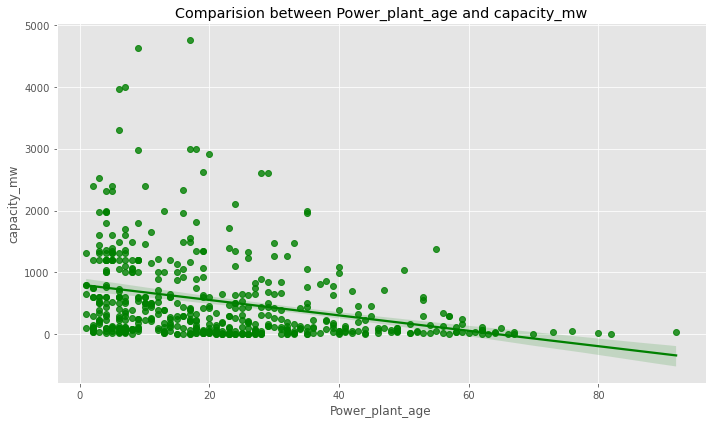

In [214]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

There is negative linear relationship between feature and label.

We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

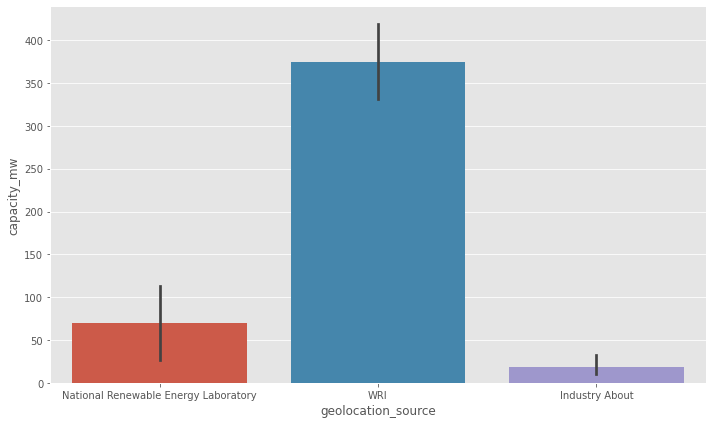

In [215]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

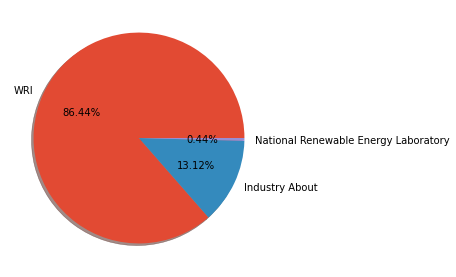

In [216]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Distribution of features

In [217]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

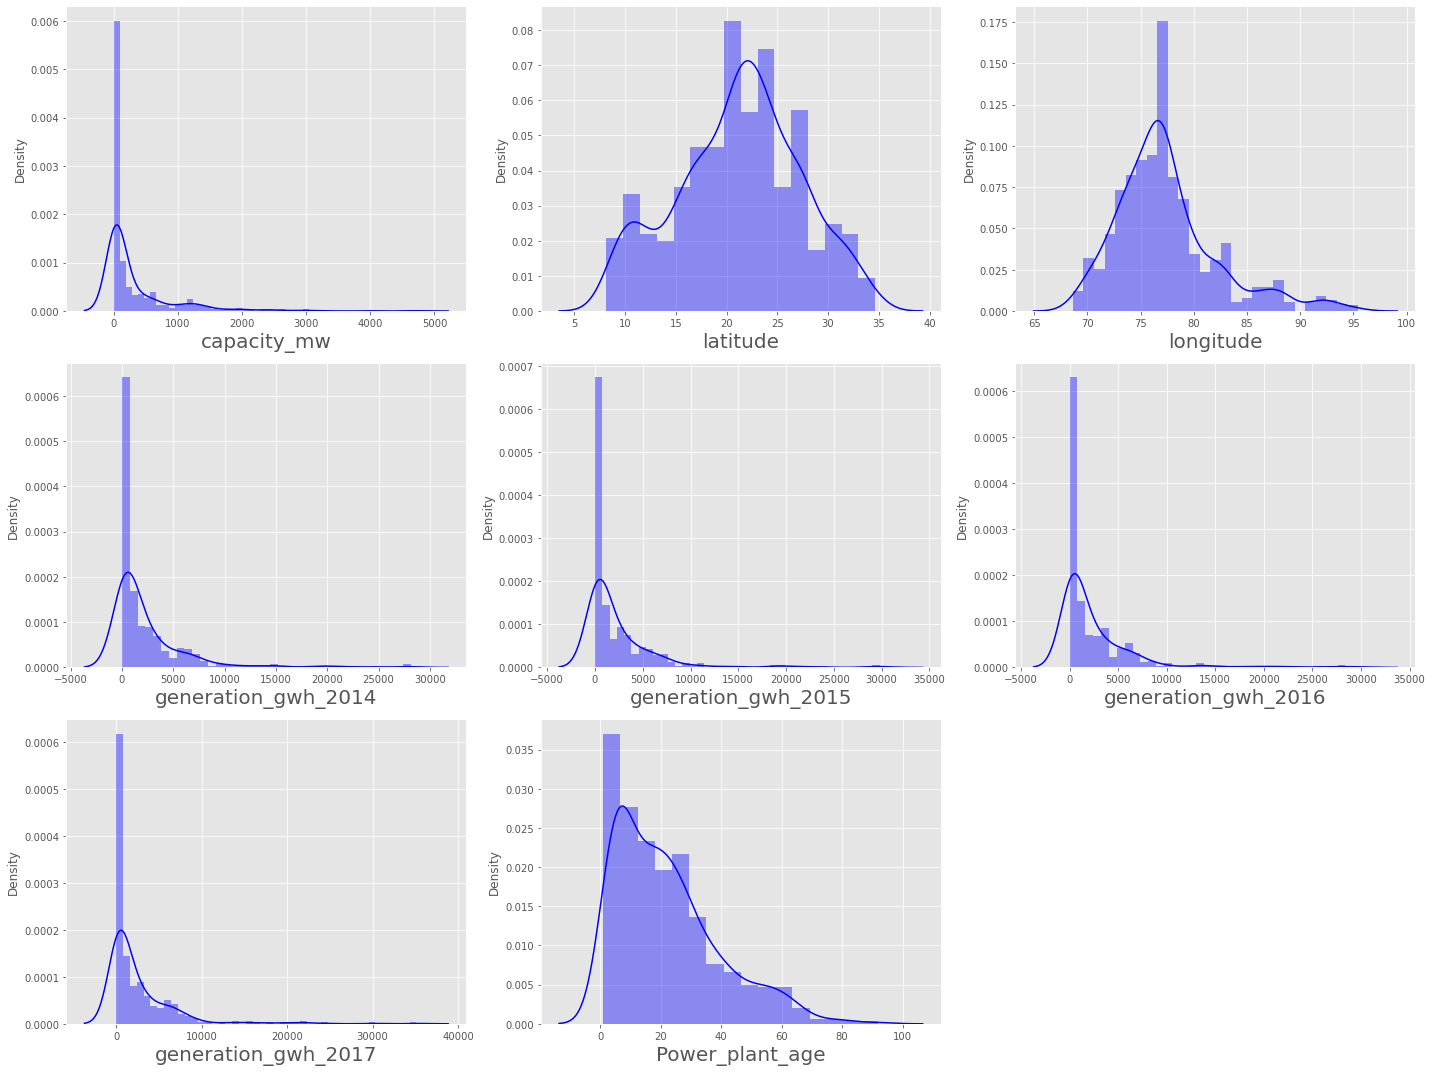

In [218]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observations:
From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
In most of the columns the mean is greater than the median which means they are skewed to right.
We will remove the skewness in all these columns except the label later.

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

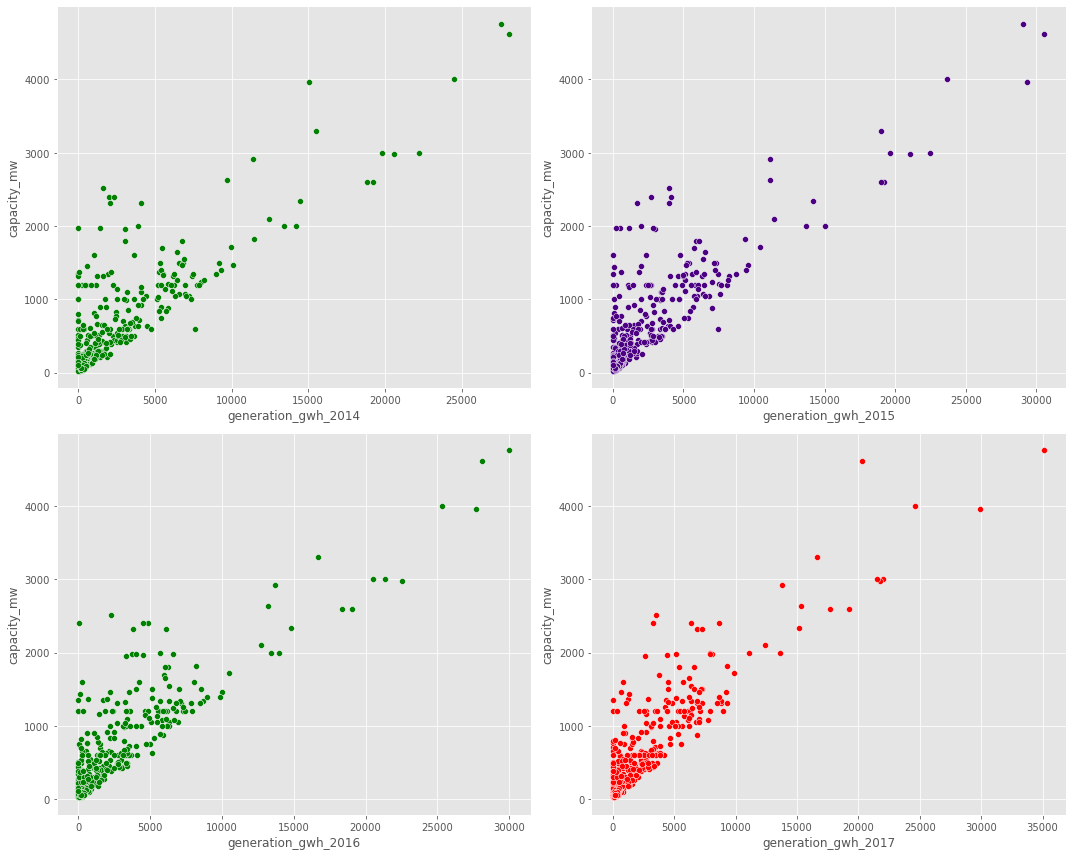

In [219]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")

# Observation:

There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.

As the electricity generation growth increases, the capacity of plant also increases.

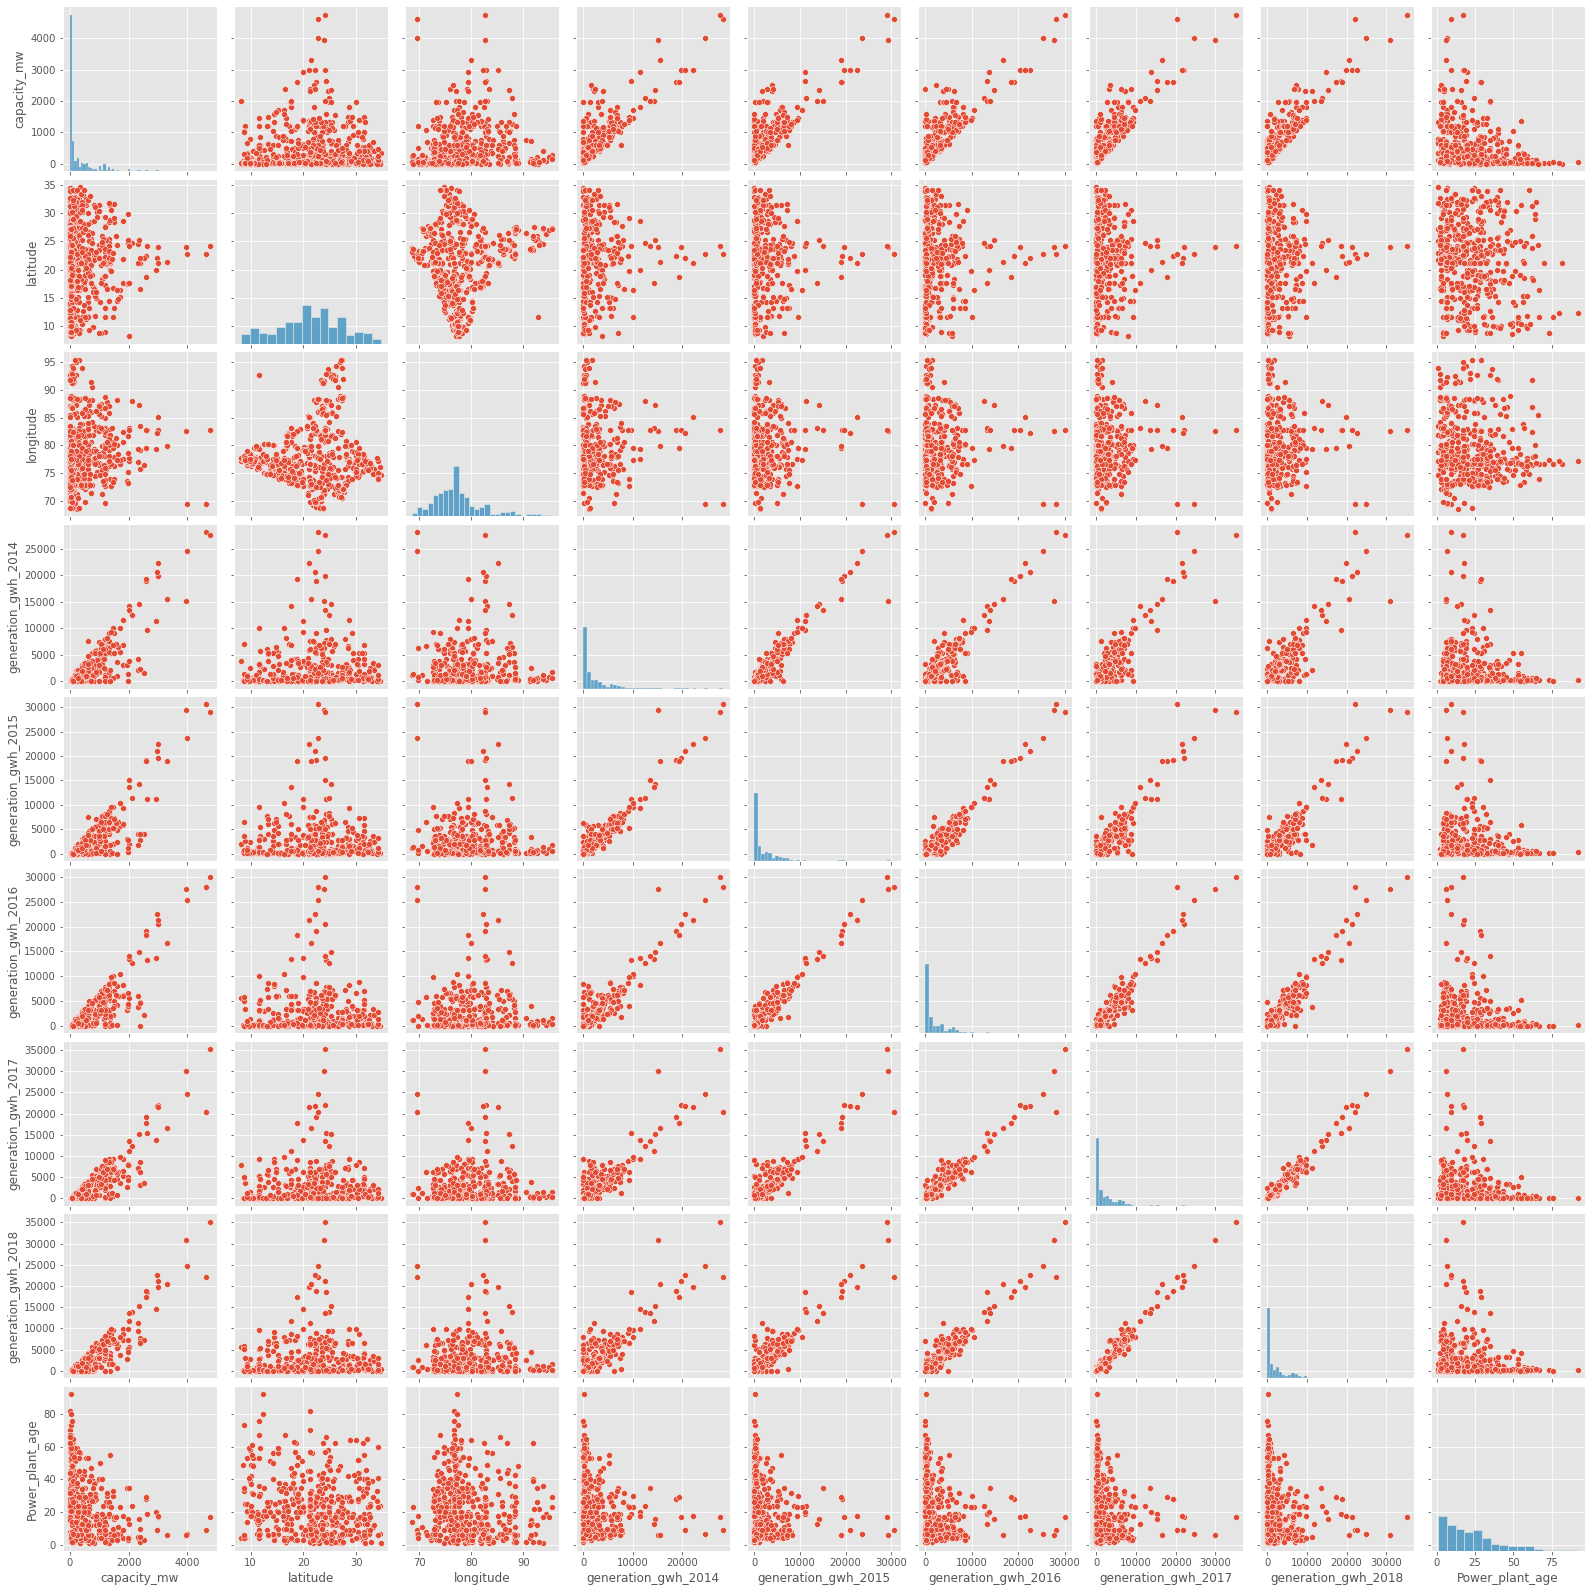

In [220]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

Observations:
    
Most of the features have strong linear relationship and correlation with each other.
From the plot we can observe the outliers in some of the columns.
We can see histogram on the diagonal.

# Encoding categorical data

In [221]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,15.0
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,3.0
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
df.drop(columns=['name'],axis=1,inplace=True)

In [223]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [224]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [225]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,8.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,4.0


# Outliers detection and removal

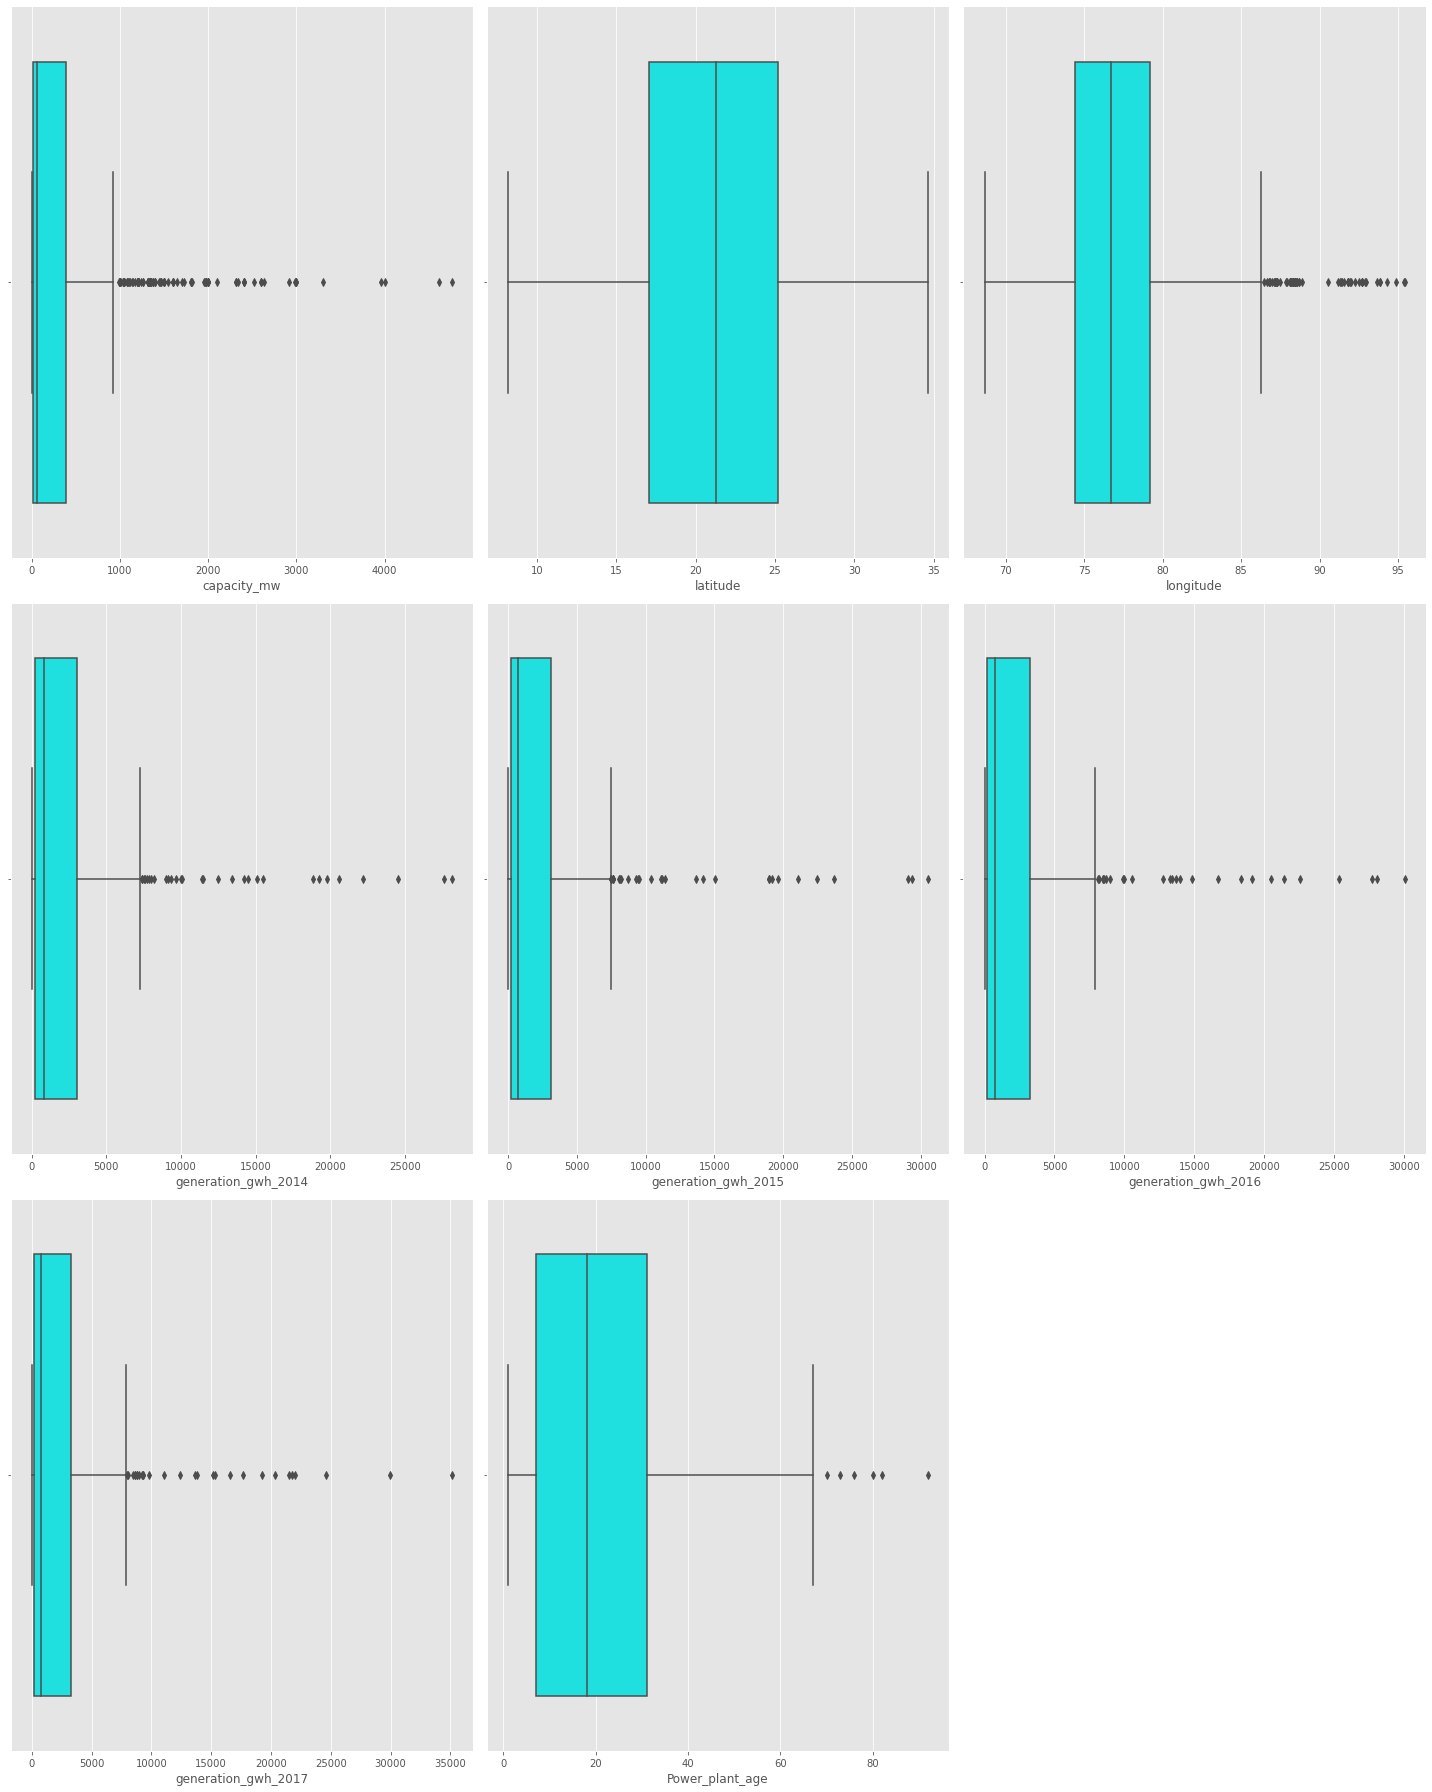

In [226]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

Observations:

There outliers exist in data.

There are no outliers in lower capping level.

So we will use Quantile-based Flooring and Capping technique.

# Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [227]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [228]:
df2=df.copy

In [229]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [230]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [231]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


# Correlation matrix

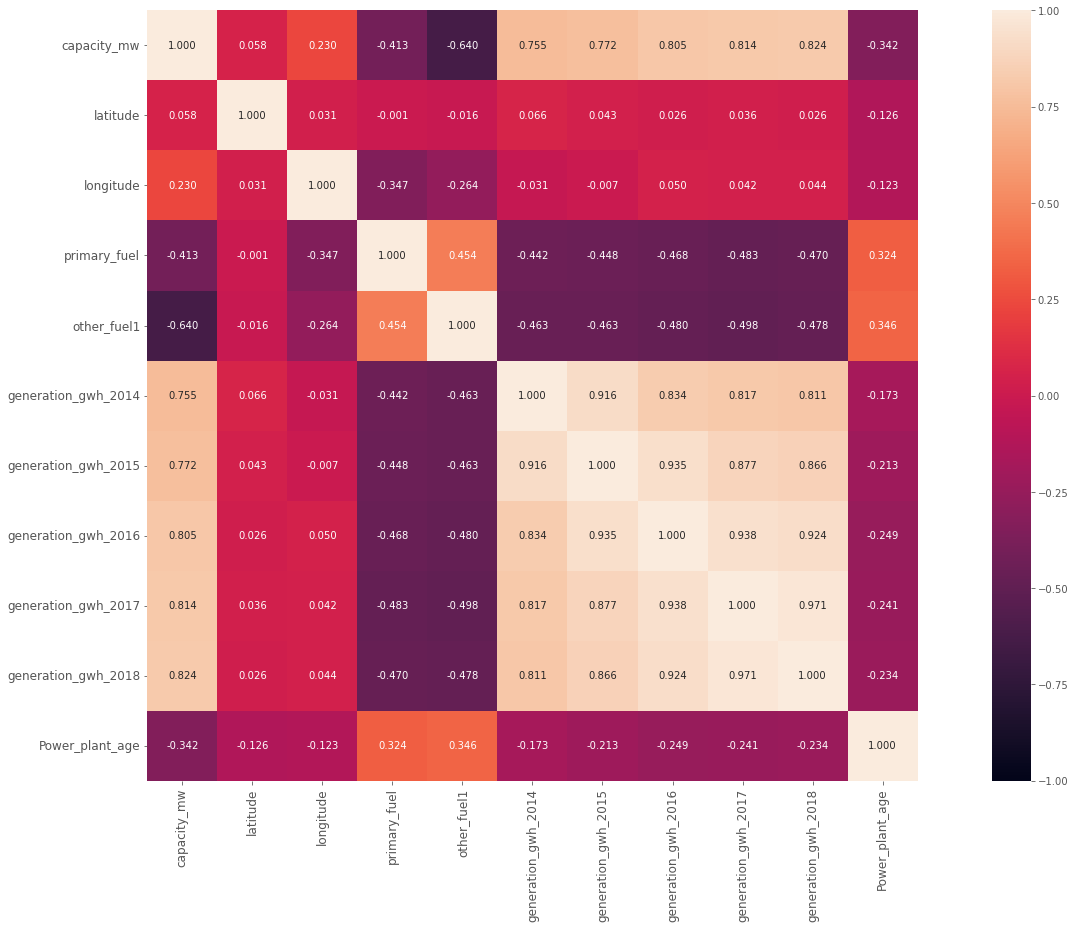

In [232]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The label capacity_mw is highly positively correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.

capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

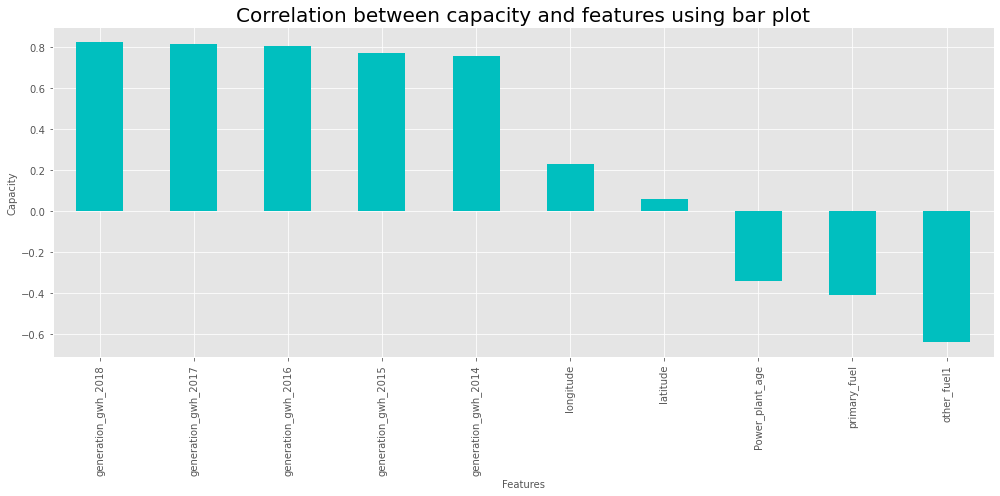

In [233]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

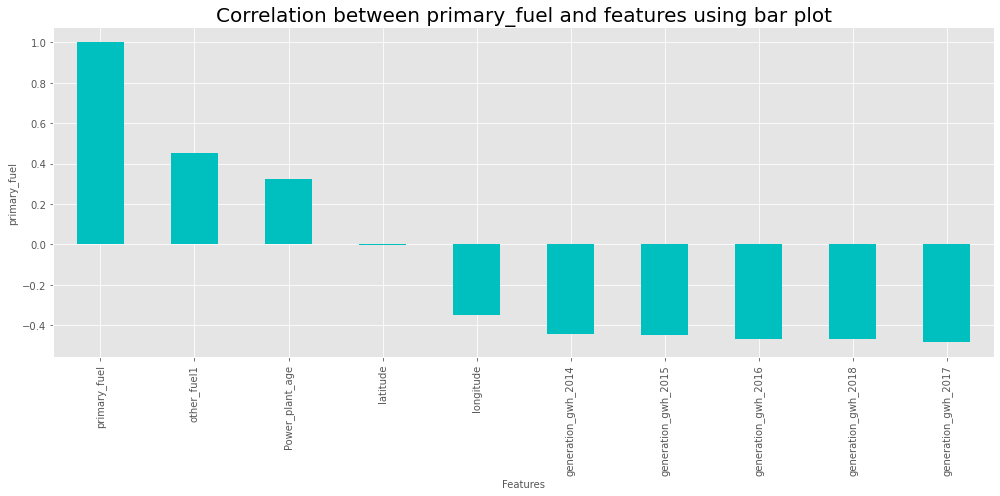

In [234]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

# Skewness

In [235]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [236]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [237]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,-0.816519
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.182889
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,-1.379508


In [238]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018    1.532123
Power_plant_age       -0.058959
dtype: float64

In [239]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [241]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

Since we have done with EDA NOW its time for removal of missing data

In [242]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Standard Scaling

In [251]:
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,-0.933334,6,NaN,-8.165190e-01
1,98.0,24.7663,-0.516718,1,NaN,2.755493e-16
2,39.2,21.9038,-2.413165,7,NaN,2.755493e-16
3,135.0,23.8712,2.166057,2,626.239128,-1.828893e-01
4,1800.0,21.9603,1.147361,1,7279.000000,-1.379508e+00
...,...,...,...,...,...,...
902,1600.0,16.2949,0.190109,1,686.500000,-1.573279e+00
903,3.0,12.8932,0.369881,6,NaN,2.755493e-16
904,25.5,15.2758,-0.248308,7,NaN,2.755493e-16
905,80.0,24.3500,-0.773353,1,NaN,2.755493e-16


In [253]:
#Filling the Null values in 'Item_Weight' column with the average weight 
data['generation_gwh_2018'].fillna(value=data['generation_gwh_2018'].mean(),inplace=True)

In [254]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [255]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 5)
Training target vector size: (613,)
Test feature matrix size: (264, 5)
Test target vector size: (264,)


# Finding best Random state

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6325757575757576 on Random_state 384


# Logistics Regression Model

In [258]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.5151515151515151


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  1  0  0  1 10]
 [ 0 38  1 20  0  0  5  5]
 [ 0  1  2 13  0  0  0  2]
 [ 0 15  2 51  0  0  0  4]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  7  0  0 24  9]
 [ 0  2  0  5  0  0 16 21]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.66      0.55      0.60        69
           2       0.40      0.11      0.17        18
           3       0.49      0.71      0.58        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.52      0.60      0.56        40
           7       0.41      0.48      0.44        44

    accuracy                           0.52       264
   macro avg       0.31      0.31      0.29       

# Decision Tree Classifier

In [259]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.696969696969697


Confusion matrix of DecisionTreeClassifier : 
 [[ 7  2  0  0  0  0  1  2]
 [ 0 43  8  6  1  4  5  2]
 [ 0  2  8  4  0  3  0  1]
 [ 0  6  4 61  0  0  1  0]
 [ 0  2  1  0  0  1  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 1  4  0  0  0  0 33  2]
 [ 3  2  1  0  0  0  9 29]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.69      0.62      0.66        69
           2       0.35      0.44      0.39        18
           3       0.86      0.85      0.85        72
           4       0.00      0.00      0.00         4
           5       0.27      0.60      0.37         5
           6       0.67      0.82      0.74        40
           7       0.81      0.66      0.73        44

    accuracy                           0.70       264
   macro avg       0.54      0.57      0.54

# Random Forest Classifier

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7878787878787878


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 2 54  4  6  0  2  0  1]
 [ 0  1  9  4  0  3  0  1]
 [ 0  4  2 66  0  0  0  0]
 [ 0  2  1  0  0  1  0  0]
 [ 0  1  0  0  0  4  0  0]
 [ 0  3  0  0  0  0 34  3]
 [ 2  2  0  0  0  0  7 33]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.77      0.78      0.78        69
           2       0.56      0.50      0.53        18
           3       0.87      0.92      0.89        72
           4       0.00      0.00      0.00         4
           5       0.40      0.80      0.53         5
           6       0.81      0.85      0.83        40
           7       0.87      0.75      0.80        44

    accuracy                           0.79       264
   macro avg       0.62      0.66      0.6

# ExtraTreesClassifier()

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7878787878787878


Confusion matrix of ExtraTreesClassifier : 
 [[ 9  1  0  0  0  0  1  1]
 [ 0 55  4  8  0  1  0  1]
 [ 0  1 11  3  0  2  0  1]
 [ 0  4  1 66  0  0  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  1  0  3  0  0]
 [ 6  3  0  0  0  0 31  0]
 [ 2  2  0  0  0  0  7 33]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.80      0.80      0.80        69
           2       0.65      0.61      0.63        18
           3       0.84      0.92      0.87        72
           4       0.00      0.00      0.00         4
           5       0.50      0.60      0.55         5
           6       0.79      0.78      0.78        40
           7       0.89      0.75      0.81        44

    accuracy                           0.79       264
   macro avg       0.62      0.65      0.63       

# Crossvalidation

In [263]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.57954545 0.53409091 0.55428571 0.57714286 0.48      ]
Mean Score : 0.545012987012987
Std deviation : 0.03648776125224564




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72159091 0.69886364 0.77714286 0.73714286 0.66857143]
Mean Score : 0.7206623376623377
Std deviation : 0.03647235949664467




Cross Validation Score RandomForestClassifier() :

Score : [0.77840909 0.8125     0.81714286 0.79428571 0.76571429]
Mean Score : 0.7936103896103895
Std deviation : 0.019597563966183902




Cross Validation Score ExtraTreesClassifier() :

Score : [0.77272727 0.80681818 0.82285714 0.77714286 0.8       ]
Mean Score : 0.7959090909090909
Std deviation : 0.018716353968824203




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [266]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.707 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.634 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.623 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.691 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.610 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [267]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50}

# Final Classification Model

In [268]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7537878787878788


In [325]:
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

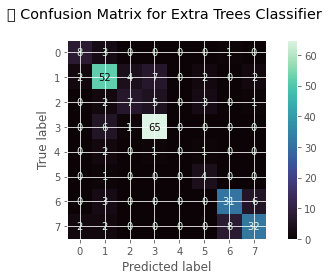

In [285]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

In [286]:
import joblib
joblib.dump(Final_mod,'powerplant_classification_Final.pkl')

['powerplant_classification_Final.pkl']

# Machine Learning Model Building Regression

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

# Feature Engineering before proceeding

In [288]:
df2=df.copy()

In [289]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [290]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [292]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,-0.816519
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.182889
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,-1.379508


In [293]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [294]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Standard Scaling

In [328]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [329]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)


Training feature matrix size: (587, 5)
Training target vector size: (587,)
Test feature matrix size: (290, 5)
Test target vector size: (290,)


In [331]:
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,-0.933334,6,1789.841575,-8.165190e-01
1,98.0,24.7663,-0.516718,1,1789.841575,2.755493e-16
2,39.2,21.9038,-2.413165,7,1789.841575,2.755493e-16
3,135.0,23.8712,2.166057,2,626.239128,-1.828893e-01
4,1800.0,21.9603,1.147361,1,7279.000000,-1.379508e+00
...,...,...,...,...,...,...
902,1600.0,16.2949,0.190109,1,686.500000,-1.573279e+00
903,3.0,12.8932,0.369881,6,1789.841575,2.755493e-16
904,25.5,15.2758,-0.248308,7,1789.841575,2.755493e-16
905,80.0,24.3500,-0.773353,1,1789.841575,2.755493e-16


In [332]:
#Filling the Null values in 'Item_Weight' column with the average weight 
data['generation_gwh_2018'].fillna(value=data['generation_gwh_2018'].mean(),inplace=True)

In [333]:
data

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,-0.933334,6,1789.841575,-8.165190e-01
1,98.0,24.7663,-0.516718,1,1789.841575,2.755493e-16
2,39.2,21.9038,-2.413165,7,1789.841575,2.755493e-16
3,135.0,23.8712,2.166057,2,626.239128,-1.828893e-01
4,1800.0,21.9603,1.147361,1,7279.000000,-1.379508e+00
...,...,...,...,...,...,...
902,1600.0,16.2949,0.190109,1,686.500000,-1.573279e+00
903,3.0,12.8932,0.369881,6,1789.841575,2.755493e-16
904,25.5,15.2758,-0.248308,7,1789.841575,2.755493e-16
905,80.0,24.3500,-0.773353,1,1789.841575,2.755493e-16


In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.6917830122265503 on Random_state 173


# Linear Regression

In [339]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 1.32025447e+02  6.71911423e+01  3.20664168e+02  5.07503286e+02
  1.21147931e+02  3.29708249e+02  5.99851656e+01  2.69412202e+02
 -1.63884268e+00  3.08060653e+02  3.48411271e+02  8.86024085e+02
  8.69742336e+01  8.22686176e+02  3.85232374e+02 -1.47610843e+02
  5.51311417e+02  3.77047247e+02 -1.90004155e+01  4.82838491e+01
  2.00886683e+01  2.31230582e+02  1.14946229e+02 -9.98037127e-01
  2.47312121e+02  7.71925495e+01  6.11492540e+01  6.41224285e+01
  5.39956877e+01  5.86128174e+02  7.71814813e+01  1.13434922e+03
  3.35934827e+02  1.32016656e+03  1.93047070e+02  9.91091022e+02
  3.63505776e+02  3.54056065e+02  8.84418193e+02  6.23665836e+02
  8.04671957e+01  1.24739449e+02  3.85208052e+01  4.11615389e+02
  2.40934737e+02  3.12574632e+02  8.17031155e+01  6.58461778e+01
  3.88289160e+02  1.82336182e+01  1.36298977e+02  1.76874968e+02
  2.05314461e+02  3.36685584e+02  4.72772836e+02  2.46220037e+02
  2.41037683e+02 -1.79539728e+02 -1.07386360e+02  5.95353669e+02
  2.7758

In [310]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 262.0854734848485
Mean squared error : 222883.94837244318
Root Mean Squared Error: 472.10586564079375


 R2 Score :
-0.44441935542861777


# Applying other ML Models

In [335]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 90.01703614761406
Mean squared error : 28036.89535137193
Root Mean Squared Error: 167.44221496197406


 R2 Score :
0.8099316259038513


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 184.50557683665104
Mean squared error : 61619.87994862126
Root Mean Squared Error: 248.23351898690325


 R2 Score :
0.5822650743937945


 Error of  DecisionTreeRegressor() :
Mean absolute error : 116.73923793103448
Mean squared error : 55836.96935558966
Root Mean Squared Error: 236.2984751444445


 R2 Score :
0.6214687166011734


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 121.17729661041999
Mean squared error : 36867.851831131644
Root Mean Squared Error: 192.0100305482285


 R2 Score :
0.7500646000157782


 Error of  GradientBoostingRegressor() :
Mean absolute error : 93.03765793946224
Mean squared error : 27963.227539002855
Root Mean Squared Error: 167.22209046355943


 R2 Score :
0.8104310364535834


 Error of

In [336]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7882022289690692


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.56740566255055


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6038944063348849


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.7463609639099555


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7917227108750522


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan

Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [316]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [317]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, 

ValueError: 
All the 3240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


# Final Regression Model

In [337]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 101.11789652770698
Mean squared error : 32310.829280122274
Root Mean Squared Error: 179.7521328945008


 R2 Score of Final Model :
0.7809576734511524




 True Values Vs Predicted Value plot :


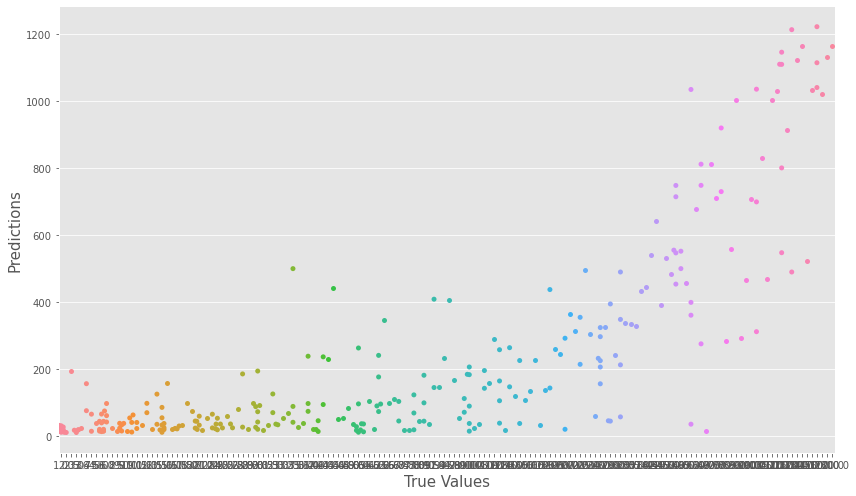

In [338]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression Saving Model

In [340]:
import joblib
joblib.dump(Final_mod,'Powerplant_regression_Final.pkl')

['Powerplant_regression_Final.pkl']